In [1]:
import math
import json
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

In [2]:
def circles(x, y, s, c='b', vmin=None, vmax=None, **kwargs):
    """
    https://stackoverflow.com/questions/9081553/python-scatter-plot-size-and-style-of-the-marker/24567352#24567352
    """
    if np.isscalar(c):
        kwargs.setdefault('color', c)
        c = None
    if 'fc' in kwargs: kwargs.setdefault('facecolor', kwargs.pop('fc'))
    if 'ec' in kwargs: kwargs.setdefault('edgecolor', kwargs.pop('ec'))
    if 'ls' in kwargs: kwargs.setdefault('linestyle', kwargs.pop('ls'))
    if 'lw' in kwargs: kwargs.setdefault('linewidth', kwargs.pop('lw'))

    patches = [Circle((x_, y_), s_) for x_, y_, s_ in np.broadcast(x, y, s)]
    collection = PatchCollection(patches, **kwargs)
    if c is not None:
        collection.set_array(np.asarray(c))
        collection.set_clim(vmin, vmax)

    ax = plt.gca()
    ax.add_collection(collection)
    ax.autoscale_view()
    if c is not None:
        plt.sci(collection)
    return collection

def calcSlope(x1,y1,x2,y2):
    if x1 == x2 and y1 == y2:
        return "NaL"
    elif x1 == x2:
        return "vertical"
    elif y1 == y2:
        return "horizontal"
    else:
        return round((y2-y1)/(x2-x1),4)

def calcDistance(x1,y1,x2,y2): 
    """
    determine the distance between 2 points on a coordinate plane
    """
    return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),4)

def calcCost(distance):
    """
    determine the cost of the movement according to the rules:
    Each swing costs the particle $D^-2, where D is the straight-line distance of the length of rope used for that particular swing.
    """
    return round(pow(distance, -2),4)

def plotPathToss(x1,y1,x2,y2):
    # plot points
    ax.plot(x1, y1, 'bo')
    ax.plot(x2, y2, 'bo')
    # plot line
    ax.plot([x1, x2],[y1, y2],'b-')
    d = calcDistance(x1, y1, x2, y2)
    # print("Distance: {0:.4f}".format(d))
    # print("Cost: {0:.4f}".format(calcCost(d)))
    # print("Sum of Squares: {0:.4f}".format(sumOfSquares(d)))
    # circles(x2, y2, d, alpha=0.2, lw=5, edgecolor='b')
    return d

def plotPathSwing(x1,y1,x2,y2,remaining):
    # plot points
    ax.plot(x1, y1, 'ro')
    ax.plot(x2, y2, 'ro')
    # plot line
    ax.plot([x1, x2],[y1, y2],'r-')
    d = calcDistance(x1, y1, x2, y2)
    d = remaining-d
    print(d)
    if d > 0:
        circles(x2, y2, d, alpha=0.2, lw=5, edgecolor='b')
    return d

def sumOfSquares(n):
    return sum([i**2 for i in range(1, math.floor(n) + 1)])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


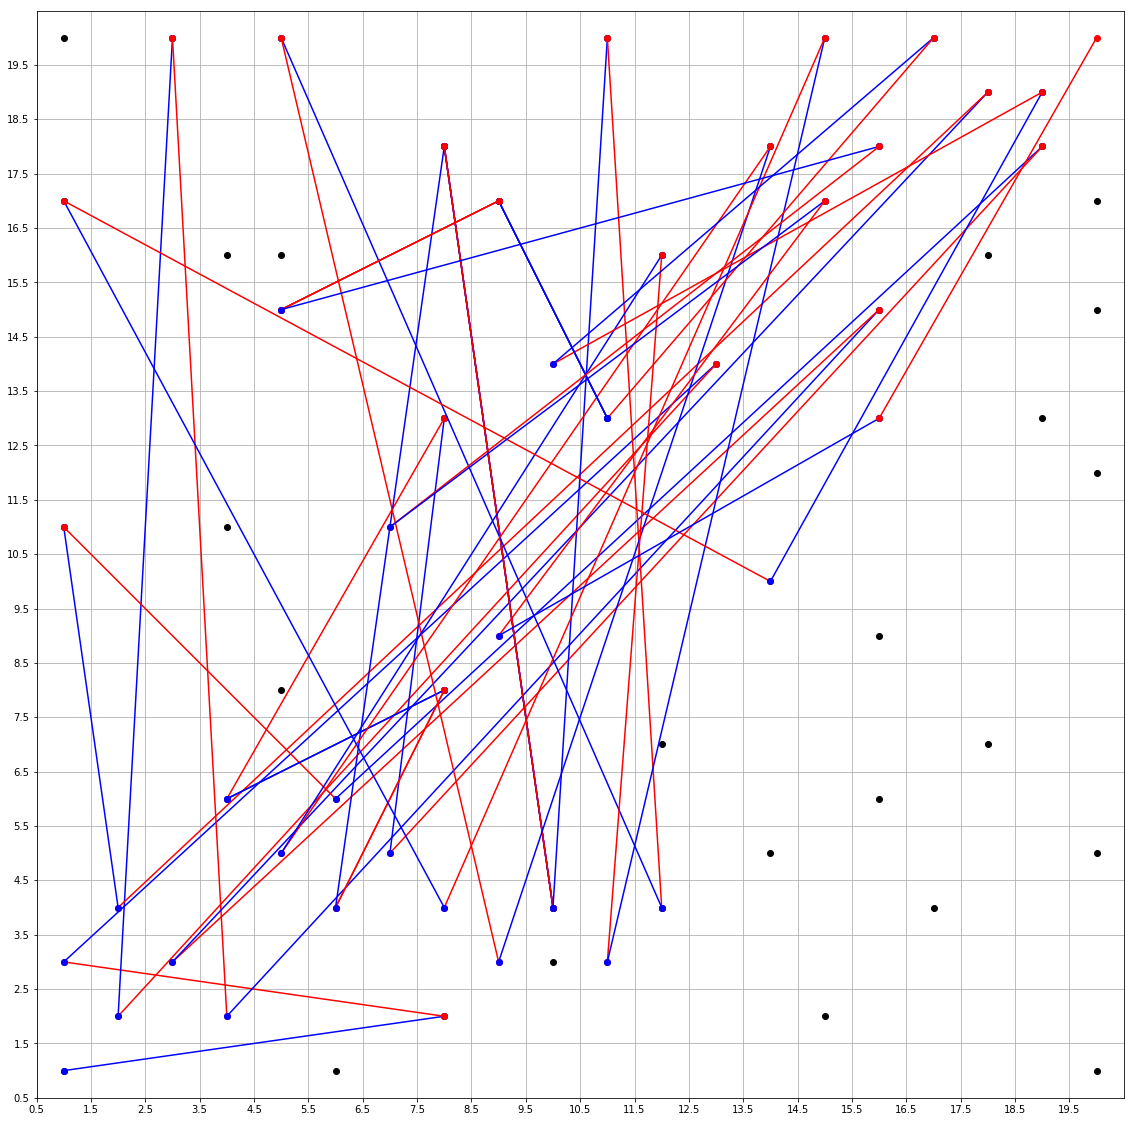

In [28]:
coords = [(1.0, 1.0), (3.0, 20.0), (5.0, 20.0), (11.0, 20.0), (15.0, 20.0), (17.0, 20.0), (18.0, 19.0), (19.0, 19.0), (8.0, 18.0), (14.0, 18.0), (16.0, 18.0), (19.0, 18.0), (1.0, 17.0), (9.0, 17.0), (15.0, 17.0), (20.0, 17.0), (4.0, 16.0), (5.0, 16.0), (12.0, 16.0), (18.0, 16.0), (16.0, 15.0), (20.0, 15.0), (13.0, 14.0), (8.0, 13.0), (16.0, 13.0), (19.0, 13.0), (20.0, 12.0), (1.0, 11.0), (4.0, 11.0), (16.0, 9.0), (5.0, 8.0), (8.0, 8.0), (12.0, 7.0), (18.0, 7.0), (16.0, 6.0), (14.0, 5.0), (20.0, 5.0), (12.0, 4.0), (17.0, 4.0), (10.0, 3.0), (8.0, 2.0), (15.0, 2.0), (1.0, 20.0), (6.0, 1.0), (20.0, 1.0)]

figure(figsize=(20,20))
ax=subplot(aspect='equal')
xlim(.5,20.5)
ylim(.5,20.5)
ax.set_xticks(np.arange(.5, 20.5, 1))
ax.set_yticks(np.arange(.5, 20.5, 1))
# plot all coordinates
[ax.plot(i[0], i[1], 'ko') for i in coords]
    
# move 1
r = plotPathToss(1,1, 8,2)
r = plotPathSwing(8,2, 1,3, r)

# # # move 2
r = plotPathToss(1,3, 13,14)
r = plotPathSwing(13,14, 2,2, r)

# # # # move 3
r = plotPathToss(2,2, 3,20)
r = plotPathSwing(3,20, 4,2, r)

# # # # move 4
r = plotPathToss(4,2, 16,15)
r = plotPathSwing(16,15, 3,3, r)

# # # move 5
r = plotPathToss(3,3, 18,19)
r = plotPathSwing(18,19, 2,4, r)

# # # move 6
r = plotPathToss(2,4, 1,11)
r = plotPathSwing(1,11, 6,6, r)

# # # move 7
r = plotPathToss(6,6, 19,18)
r = plotPathSwing(19,18, 7,5, r)

# # # move 8
r = plotPathToss(7,5, 8,13)
r = plotPathSwing(8,13, 4,6, r)

# # # move 9
r = plotPathToss(4,6, 8,8)
r = plotPathSwing(8,8, 6,4, r)

# # # move 10
r = plotPathToss(4,6, 8,8)
r = plotPathSwing(8,8, 6,4, r)

# # # move 11
r = plotPathToss(6,4, 8,18)
r = plotPathSwing(8,18, 10,4, r)

# # # move 12
r = plotPathToss(10,4, 8,18)
r = plotPathSwing(8,18, 10,4, r)

# # # move 13
r = plotPathToss(10,4, 8,18)
r = plotPathSwing(8,18, 10,4, r)

# # # move 14
r = plotPathToss(10,4, 11,20)
r = plotPathSwing(11,20, 12,4, r)

# # # move 15
r = plotPathToss(12,4, 5,20)
r = plotPathSwing(5,20, 9,3, r)

# # # move 16
r = plotPathToss(9,3, 14,18)
r = plotPathSwing(14,18, 5,5, r)

# # # move 17
r = plotPathToss(5,5, 12,16)
r = plotPathSwing(12,16, 11,3, r)

# # # move 18
r = plotPathToss(11,3, 15,20)
r = plotPathSwing(15,20, 8,4, r)

# # # move 19
r = plotPathToss(8,4, 1,17)
r = plotPathSwing(1,17, 14,10, r)

# # # move 20
r = plotPathToss(14,10, 19,19)
r = plotPathSwing(19,19, 10,14, r)

# # # move 21
r = plotPathToss(10,14, 17,20)
r = plotPathSwing(17,20, 11,13, r)

# # # move 22
r = plotPathToss(11,13, 9,17)
r = plotPathSwing(9,17, 5,15, r)

# # # move 23
r = plotPathToss(11,13, 9,17)
r = plotPathSwing(9,17, 5,15, r)

# # # move 24
r = plotPathToss(11,13, 9,17)
r = plotPathSwing(9,17, 5,15, r)

# # # move 25
r = plotPathToss(5,15, 16,18)
r = plotPathSwing(16,18, 7,11, r)

# # # move 26
r = plotPathToss(7,11, 15,17)
r = plotPathSwing(15,17, 9,9, r)

# # # move 27
r = plotPathToss(9,9, 16,13)
r = plotPathSwing(16,13, 20,20, r)

plt.grid()


In [13]:
print(calcDistance(6,8, 17,20))
print(calcDistance(17,20, 13,14))
print(calcDistance(13,14, 12,7))
print(16.2788-(7.2111+7.0711))

16.2788
7.2111
7.0711
1.9966000000000008


In [14]:
print(calcDistance(12,7,14,8))
print(calcDistance(.5,.5,1.5,1.5))
print(calcDistance(.5,.5,.5,1.5))
print(calcDistance(.5,.5,1.5,1.5))

2.2361
1.4142
1.0
1.4142


In [31]:
upper = [("H2", "A3"),
("M14", "B2"),
("C20", "D2"),
("P15", "C3"),
("R19", "B4"),
("A11", "F6"),
("S18", "G5"),
("H13", "D6"),
("H8", "F4"),
("H18", "J4"),
("K20", "L4"),
("E20", "I3"),
("N18", "E5"),
("L16", "K3"),
("O20", "H4"),
("A17", "N10"),
("S19", "J14"),
("Q20", "K13"),
("I17", "E15"),
("P18", "G11"),
("O17", "I9"),
("P13", "T20")]

In [32]:
upper

[('H2', 'A3'),
 ('M14', 'B2'),
 ('C20', 'D2'),
 ('P15', 'C3'),
 ('R19', 'B4'),
 ('A11', 'F6'),
 ('S18', 'G5'),
 ('H13', 'D6'),
 ('H8', 'F4'),
 ('H18', 'J4'),
 ('K20', 'L4'),
 ('E20', 'I3'),
 ('N18', 'E5'),
 ('L16', 'K3'),
 ('O20', 'H4'),
 ('A17', 'N10'),
 ('S19', 'J14'),
 ('Q20', 'K13'),
 ('I17', 'E15'),
 ('P18', 'G11'),
 ('O17', 'I9'),
 ('P13', 'T20')]

In [37]:
for i in upper:
    print((i[0].lower(),(i[1].lower())))

('h2', 'a3')
('m14', 'b2')
('c20', 'd2')
('p15', 'c3')
('r19', 'b4')
('a11', 'f6')
('s18', 'g5')
('h13', 'd6')
('h8', 'f4')
('h18', 'j4')
('k20', 'l4')
('e20', 'i3')
('n18', 'e5')
('l16', 'k3')
('o20', 'h4')
('a17', 'n10')
('s19', 'j14')
('q20', 'k13')
('i17', 'e15')
('p18', 'g11')
('o17', 'i9')
('p13', 't20')
